In [12]:
%pylab inline
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Speeds Of Sound
vMount = 1944.      # m/s (taken from sqrt(E/rho) using numbers from https://www.shapeways.com/rrstatic/material_docs/mds-strongflex.pdf)
vPipe = 2395.       # m/s
vWater = 1480.      # m/s

In [14]:
thetaMount = 45.    # degrees
thetaPipe = rad2deg(arcsin((vPipe / vMount) * sin(deg2rad(thetaMount))))
thetaWater = rad2deg(arcsin((vWater / vMount) * sin(deg2rad(thetaMount))))
print(thetaPipe)
print(thetaWater)

60.5928617356
32.5701848591


In [15]:
# Distances (thickness of material)
dWater = 0.01905    # m
dPipe = 0.00287     # m
dMount = 0.005781   # m

In [16]:
IN_PER_M = 39.3701

# Separation
waterSep = 2 * dWater * tan(deg2rad(thetaWater))
pipeSep = 2 * dPipe * tan(deg2rad(thetaPipe))
mountSep = 2 * dMount * tan(deg2rad(thetaMount))
totalSep = waterSep + pipeSep + mountSep

print("Water Separation: {}m = {}in".format(round(waterSep, 5), round(waterSep * IN_PER_M, 5)))
print("Pipe Separation: {}m = {}in".format(round(pipeSep, 5), round(pipeSep * IN_PER_M, 5)))
print("Mount Separation: {}m = {}in".format(round(mountSep, 5), round(mountSep * IN_PER_M, 5)))
print("Total Separation: {}m = {}in".format(round(totalSep, 5), round(totalSep * IN_PER_M, 5)))

Water Separation: 0.02434m = 0.95819in
Pipe Separation: 0.01018m = 0.40094in
Mount Separation: 0.01156m = 0.4552in
Total Separation: 0.04608m = 1.81433in


In [17]:
hBlockThickness = 0.0187684918  # m
blockSep = totalSep - 2 * (hBlockThickness)  # m
print("Block Separation: {}m = {}in".format(round(blockSep, 5), round(blockSep * IN_PER_M, 5)))

Block Separation: 0.00855m = 0.33649in


In [18]:
def rayTrace():
    x1 = 0
    y1 = 0
    
    x2 = x1 + dMount * tan(deg2rad(thetaMount))
    y2 = y1 - dMount
    
    mountDistanceTraveled = 2 * sqrt((x2-x1)**2 + (y2-y1)**2)
#     print mountDistanceTraveled
    
    x3 = x2 + dPipe * tan(deg2rad(thetaPipe))
    y3 = y2 - dPipe
    
    pipeDistanceTraveled = 2 * sqrt((x3-x2)**2 + (y3-y2)**2)
#     print pipeDistanceTraveled
    
    x4 = x3 + dWater * tan(deg2rad(thetaWater))
    y4 = y3 - dWater

    waterDistanceTraveled = 2 * sqrt((x4-x3)**2 + (y4-y3)**2)
#     print waterDistanceTraveled
    
    x5 = x4 + dWater * tan(deg2rad(thetaWater))
    y5 = y3
    
    x6 = x5 + dPipe * tan(deg2rad(thetaPipe))
    y6 = y2
    
    x7 = x6 + dMount * tan(deg2rad(thetaMount))
    y7 = y1
    
    fig = figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax1.add_patch(
        patches.Rectangle(
            (0, y1),         # (x,y)
            hBlockThickness,       # width
            y2-y1,          # height
            color='grey',
            ec='black'
        )
    )
    ax1.add_patch(
        patches.Rectangle(
            (totalSep - hBlockThickness, y1),         # (x,y)
            hBlockThickness,       # width
            y2-y1,          # height
            color='grey',
            ec='black'
        )
    )
    ax1.add_patch(
        patches.Rectangle(
            (hBlockThickness, y1),         # (x,y)
            blockSep,       # width
            y2-y1,          # height
            color='#e09e69',
            ec='black'
        )
    )
    ax1.add_patch(
        patches.Rectangle(
            (0, y2),         # (x,y)
            totalSep,       # width
            y3-y2,          # height
            color='white',
            ec='black'
        )
    )
    ax1.add_patch(
        patches.Rectangle(
            (0, y3),         # (x,y)
            totalSep,       # width
            y4-y3,          # height
            color='blue',
            ec='black'
        )
    )
    
    # Transmitted
    ax1.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
    ax1.plot([x2, x3], [y2, y3], color='k', linestyle='-', linewidth=2)
    ax1.plot([x3, x4], [y3, y4], color='k', linestyle='-', linewidth=2)
    
    # Reflected
    ax1.plot([x4, x5], [y4, y5], color='k', linestyle='-', linewidth=2)
    ax1.plot([x5, x6], [y5, y6], color='k', linestyle='-', linewidth=2)
    ax1.plot([x6, x7], [y6, y7], color='k', linestyle='-', linewidth=2)
    
    ax1.annotate('Plastic Mount', xy=(0, 0), xytext=(hBlockThickness/2,  y1 + (y2 - y1) / 2)) 
    ax1.annotate('Block Sep\n= {}\"'.format(round(blockSep * IN_PER_M, 5)), xy=(0, 0), xytext=(0.9*totalSep/2,  y1 + (y2 - y1) / 2)) 
    ax1.annotate('PVC Pipe Wall', xy=(0, 0), xytext=(0.9*totalSep/2, y2 + (y3 - y2) / 2)) 
    ax1.annotate('Water', xy=(0, 0), xytext=(0.9*totalSep/2, y3 + (y4 - y3) / 2)) 
    
    totalTime = mountDistanceTraveled / vMount + pipeDistanceTraveled / vPipe + waterDistanceTraveled / vWater
    print('Total Predicted Transit Time: {}us'.format(totalTime * 1e6))

Total Predicted Transit Time: 43.8394804093us


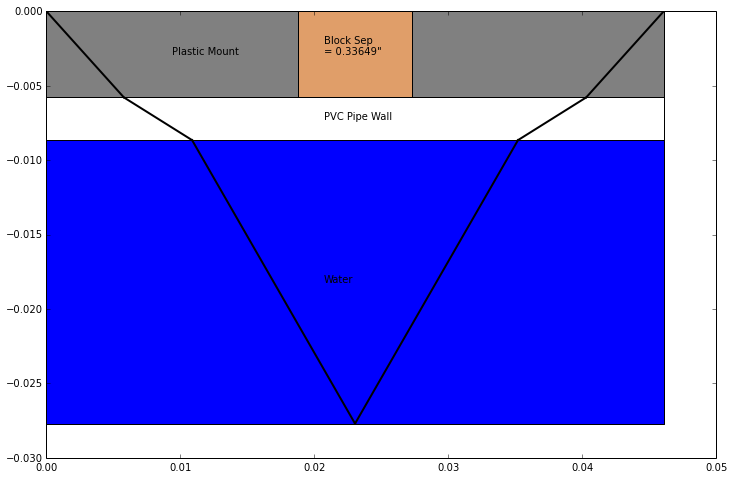

In [19]:
rayTrace()